In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [14]:
# Sea level pressure from NCEP
# https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html
# in the talbe i chose sea level pressure, monthly mean
fn='/Volumes/DATA2/CMIP6/psl/historical/combined/psl_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
dt=xr.open_dataset(fn)
dt.close()
dt.coords['lon'] = np.mod(dt.coords['lon'] + 180,360) - 180
dt = dt.sortby(dt.lon)
dt

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 -179.1 -177.2 -175.3 -173.4 ... 175.3 177.2 179.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2015-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -88.75 -88.75 ... 88.75 88.75 90.0
    lon_bnds   (lon, bnds) float64 180.0 181.9 181.9 183.8 ... 178.1 178.1 180.0
    psl        (time, lat, lon) float32 100268.0 100266.94 ... 102868.25
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T07:27:00Z
    data_specs_version:     01.00.30
    experiment:             all-for

In [19]:
dts = dt.sel(lon=slice(-175,-115),lat=slice(20,65),time=slice('1948-01-16','2014-12-16'))
#print(dts)
# seasonal climatology
dts2 = dt.groupby('time.month').mean('time')
dts2
# winter
dtsw = dts2.sel(month=slice(1,3)).mean('month')
# summer
dtss = dts2.sel(month=slice(6,8)).mean('month')
dtsw

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 144, lon: 192)
Coordinates:
  * lat       (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon       (lon) float64 -179.1 -177.2 -175.3 -173.4 ... 175.3 177.2 179.1
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -90.0 -88.75 -88.75 -87.5 ... 88.75 88.75 90.0
    lon_bnds  (lon, bnds) float64 180.0 181.9 181.9 183.8 ... 178.1 178.1 180.0
    psl       (lat, lon) float32 100020.664 100020.02 ... 102295.04 102295.164

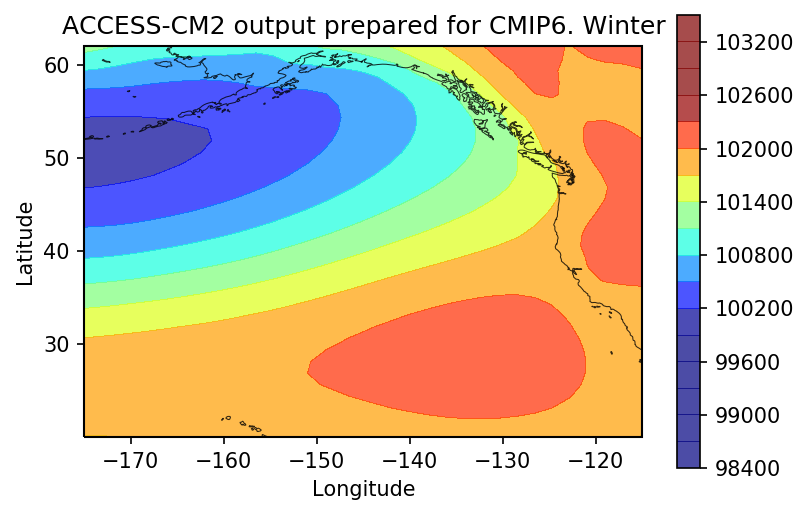

In [20]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtsw.lon,dtsw.lat,dtsw.psl,15, alpha=0.7, cmap='jet', vmin=100000, vmax=102500)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title(dt.attrs['title']+'. Winter')
plt.savefig('./SLP_winter_NCEP.png')
plt.show()

dt.attr

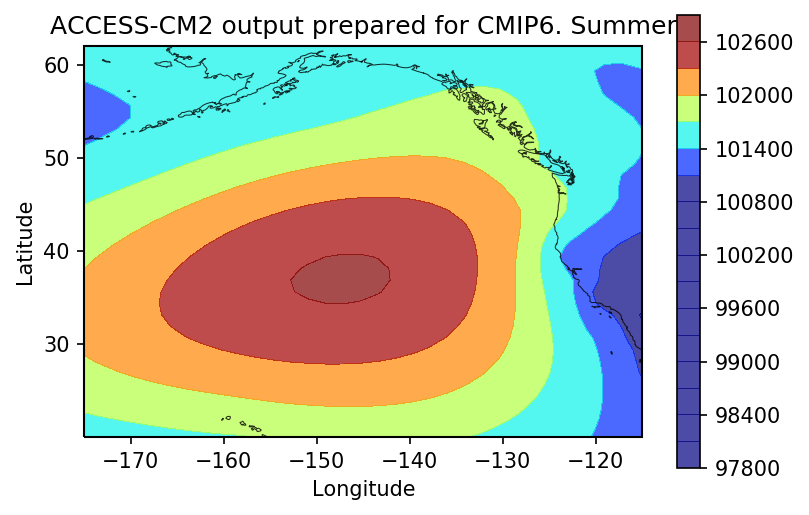

In [21]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtss.lon,dtss.lat,dtss.psl,15, alpha=0.7, cmap='jet', vmin=101000, vmax=102500)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title(dt.attrs['title']+'. Summer')
plt.savefig('./SLP_summer_NCEP.png')
plt.show()

In [4]:
## from HadSST
# https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html
# at the bottom of the page is the netcdf file
fn='/Volumes/DATA2/CMIP6/tos/historical/combined/tos_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'
dt=xr.open_dataset(fn)
dt.close()
dt=dt.where(dt.tos<10**19)
dt

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 300, time: 1980, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 -77.88 -77.88 -77.88 ... 65.63 65.21
    longitude           (j, i) float64 80.5 81.5 82.5 83.5 ... 79.96 79.97 79.99
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds, j, i) datetime64[ns] NaT NaT ... NaT NaT
    vertices_latitude   (j, i, vertices, time) float64 nan nan nan ... nan nan
    vertices_longitude  (j, i, vertices, time) float64 nan nan nan ... nan nan
    tos                 (time, j, i) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method: 

In [5]:
dt2=dt.where((dt.latitude<65)&(dt.latitude>20)&(dt.longitude>185)&(dt.longitude<245))
dt2



<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 300, time: 1980, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 -77.88 -77.88 -77.88 ... 65.63 65.21
    longitude           (j, i) float64 80.5 81.5 82.5 83.5 ... 79.96 79.97 79.99
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds, j, i) datetime64[ns] NaT NaT ... NaT NaT
    vertices_latitude   (j, i, vertices, time) float64 nan nan nan ... nan nan
    vertices_longitude  (j, i, vertices, time) float64 nan nan nan ... nan nan
    tos                 (time, j, i) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method: 

In [6]:
dts = dt2.sel(time=slice('1950-01-16','2014-12-16'))

print(dts)
# seasonal climatology
dts = dt2.groupby('time.month').mean('time')

# winter
dtsw = dts.sel(month=slice(1,3)).mean('month')
# summer
dtss = dts.sel(month=slice(6,8)).mean('month')
dtsw

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 300, time: 780, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 -77.88 -77.88 -77.88 ... 65.63 65.21
    longitude           (j, i) float64 80.5 81.5 82.5 83.5 ... 79.96 79.97 79.99
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds, j, i) datetime64[ns] NaT NaT ... NaT NaT
    vertices_latitude   (j, i, vertices, time) float64 nan nan nan ... nan nan
    vertices_longitude  (j, i, vertices, time) float64 nan nan nan ... nan nan
    tos                 (time, j, i) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:  

/Users/daisy/opt/miniconda3/envs/tutorialenv/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/daisy/opt/miniconda3/envs/tutorialenv/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:             (i: 360, j: 300, vertices: 4)
Coordinates:
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 -77.88 -77.88 -77.88 ... 65.63 65.21
    longitude           (j, i) float64 80.5 81.5 82.5 83.5 ... 79.96 79.97 79.99
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (j, i, vertices) float64 nan nan nan nan ... nan nan nan
    vertices_longitude  (j, i, vertices) float64 nan nan nan nan ... nan nan nan
    tos                 (j, i) float32 nan nan nan nan nan ... nan nan nan nan

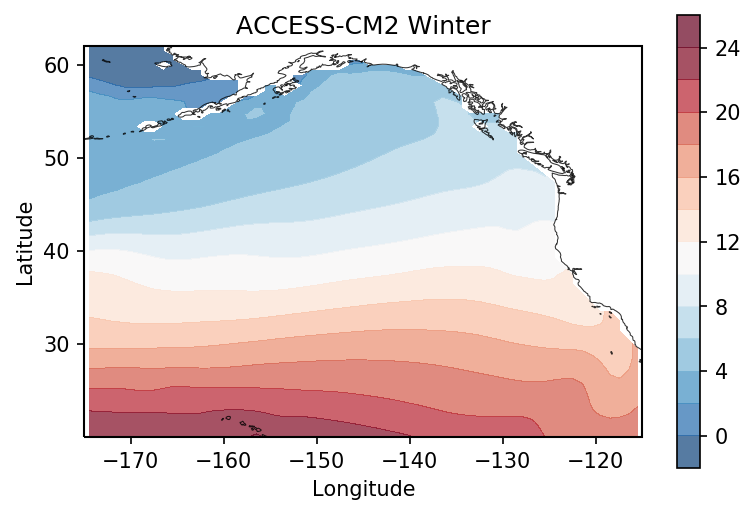

In [7]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtsw.longitude,dtsw.latitude,dtsw.tos,15, alpha=0.7, cmap='RdBu_r',vmin=-2,vmax=24)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('ACCESS-CM2 Winter')
plt.savefig('./SST_winter_ACCESS-CM2.png')
plt.show()

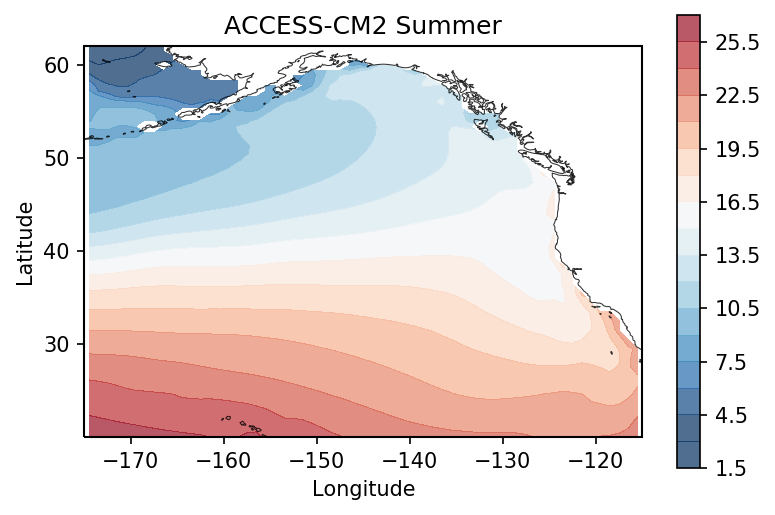

In [8]:
fig=plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m',linewidth=0.5,color='black',alpha=0.8)
ax.set_extent([-175,-115,20,62],crs=ccrs.PlateCarree())
ax.set_xticks([-170, -160, -150, -140, -130,-120], crs=ccrs.PlateCarree())
ax.set_yticks([30,40,50,60], crs=ccrs.PlateCarree())
plt.contourf(dtss.longitude,dtss.latitude,dtss.tos,20, alpha=0.7, cmap='RdBu_r',vmin=4,vmax=28)
plt.colorbar()
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('ACCESS-CM2 Summer')
plt.savefig('./SST_summer_ACCESS-CM2.png')
plt.show()